<a href="https://colab.research.google.com/github/SalvadorRdR/IAC_2022/blob/main/MODELO%20IGRF13/Modelo_IGRF_13_IAC2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from datetime import datetime

In [2]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF
!pip install basemap

fatal: destination path 'ppigrf' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import ppigrf
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

#Function

In [30]:
#Lati -> it's a vector [Lat_min , Lat_max]
#Long -> it's a vector [Long_min , Long_max]
#Relu -> image resolution
#dat -> datetime( Year, Month , Day)
#h -> studio height
#-----------------------------------------
#returns the  magnetic field data

def MagneticField(Lati,Long,Relu,date,h): 
  cmap = plt.get_cmap('rainbow') 
  dx, dy = Relu, Relu                  # Resolución de cada punto, 
  Lat, Lon = np.mgrid[slice(Lati[0], Lati[1] + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(Long[0], Long[1] + dx, dx)]
  Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)
  Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto
  Bt=np.squeeze(Bt)
  levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
  norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
  fig = plt.figure(figsize = (15,15))
  map = Basemap(projection='mill', 
              lat_0=Lati[0]+(Lati[1]-Lati[0])/2, lon_0= Long[0]+(Long[1]-Long[0])/2,
              llcrnrlon=Long[0], 
              llcrnrlat=Lati[0], 
              urcrnrlon=Long[1], 
              urcrnrlat=Lati[1],resolution='c')
  map.drawcoastlines()
  map.drawcountries(linewidth=0.5)
  map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
  map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
  #map.fillcontinents(color='coral',lake_color='aqua')
  data=Bt
  x = linspace(0, map.urcrnrx, data.shape[1])
  y = linspace(0, map.urcrnry, data.shape[0])
  xx, yy = meshgrid(x, y)
  im=map.pcolormesh(xx, yy, data,cmap=cmap,vmin=17000,vmax=30000)
  cs = map.contour(xx, yy, data, range(int(Bt.min()),int( Bt.max()*3/4), 500), levels = 30,cmap = plt.cm.cubehelix)
  cbar = map.colorbar(im, location='right', pad="3%")
  cbar.set_label('Bt', fontsize=13)
  plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
  plt.ylabel("Latitude", fontsize=15, labelpad=35)
  plt.xlabel("Longitude", fontsize=15, labelpad=20)
  plt.show()
  
  df = pd.DataFrame(data,index=Lat[:,0],columns=Lon[0,:])
  return data ,df

In [20]:

def MagneticField_Small(Lati,Long,Relu,date,h): 
  cmap = plt.get_cmap('seismic') 
  dx, dy = Relu, Relu                  # Resolución de cada punto, 
  Lat, Lon = np.mgrid[slice(Lati[0], Lati[1] + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(Long[0], Long[1] + dx, dx)]
  Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)
  Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto
  Bt=np.squeeze(Bt)
  levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
  norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
  fig = plt.figure(figsize = (15,15))
  map = Basemap(projection='mill', 
              lat_0=Lati[0]+(Lati[1]-Lati[0])/2, lon_0= Long[0]+(Long[1]-Long[0])/2,
              llcrnrlon=Long[0], 
              llcrnrlat=Lati[0], 
              urcrnrlon=Long[1], 
              urcrnrlat=Lati[1],resolution='c')
  map.drawcoastlines()
  map.drawcountries(linewidth=0.5)
  map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
  map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
  #map.fillcontinents(color='coral',lake_color='aqua')
  data=Bt
  x = linspace(0, map.urcrnrx, data.shape[1])
  y = linspace(0, map.urcrnry, data.shape[0])
  xx, yy = meshgrid(x, y)
  im=map.pcolormesh(xx, yy, data,cmap=cmap,vmin=17000,vmax=30000)
  cs = map.contour(xx, yy, data, range(int(Bt.min()),int( Bt.max()*3/4), 500), levels = 30,cmap = plt.cm.cubehelix)
  cbar = map.colorbar(im, location='right', pad="3%")
  cbar.set_label('Bt', fontsize=13)
  plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
  plt.ylabel("Latitude", fontsize=15, labelpad=35)
  plt.xlabel("Longitude", fontsize=15, labelpad=20)
  plt.show()
  
  df = pd.DataFrame(data,index=Lat[:,0],columns=Lon[0,:])
  return data ,df

#Plot and Data

**First**

In [42]:
Long=[-111,16]
Lati=[-56,23]
h=614
Relu=0.5
date = datetime(2014, 8, 17)

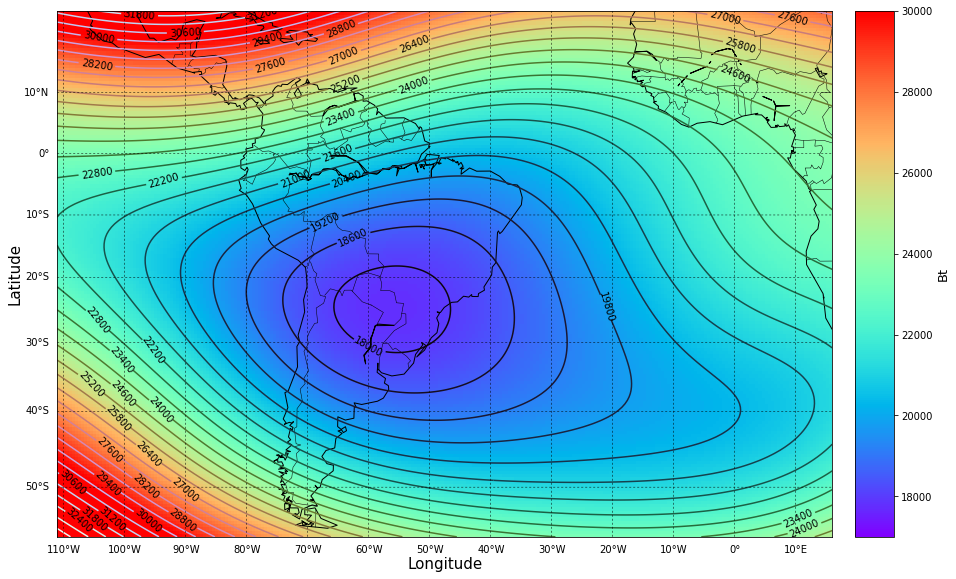

In [43]:
Data1 ,DfData1 =MagneticField(Lati,Long,Relu,date,h)

Previous image zoom (Paraguay)

In [44]:
Long=[-70,-40]
Lati=[-30,0]
h=614
Relu=0.5
date = datetime(2014, 8, 17)

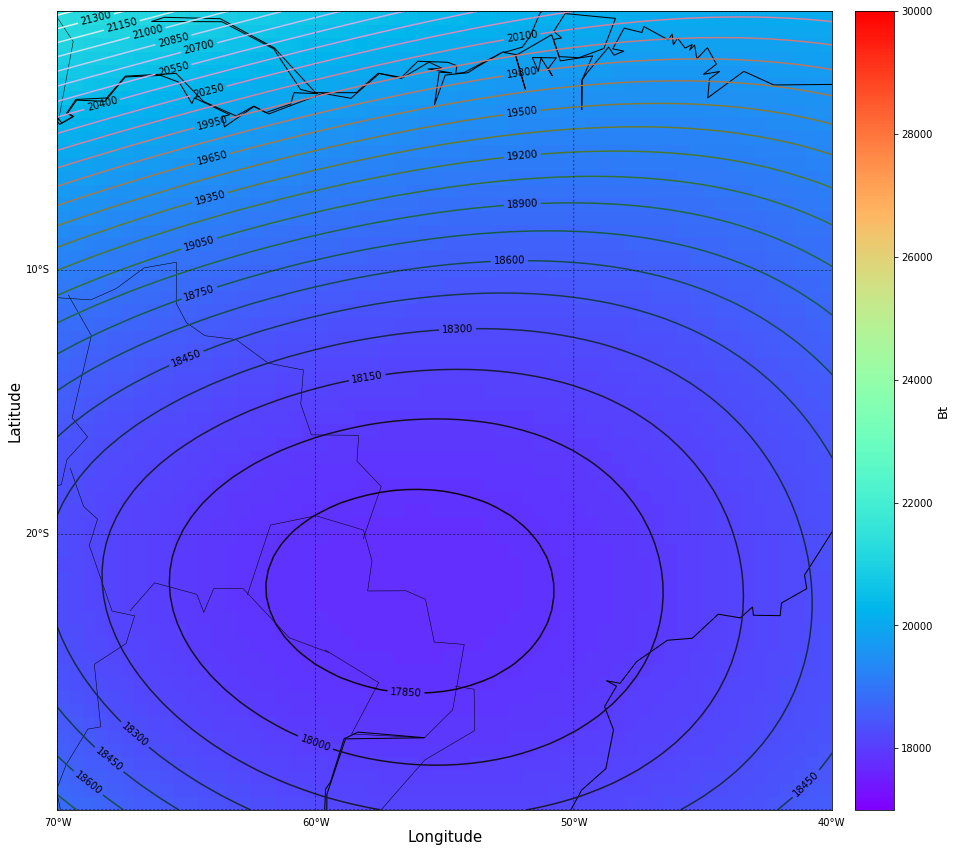

In [45]:
Data1s ,DfData1s =MagneticField(Lati,Long,Relu,date,h)

Data Frame

In [ ]:
DfData1.to_csv('MagneticField_T1.csv',sep='\t')
!cp data.csv "drive"
DfData1s.to_csv('MagneticField_T1_zoom.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


**Second**

In [ ]:
Long=[-111,-25]
Lati=[-40,23]
h=614
Relu=0.1
date = datetime(2014, 8, 17)

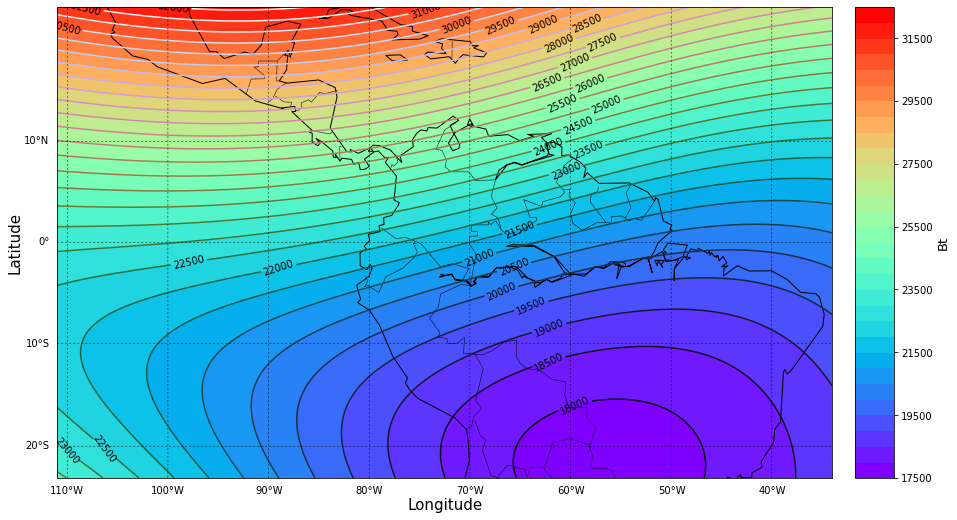

In [ ]:
Data2 ,DfData2 =MagneticField(Lati,Long,Relu,date,h)

Data Frame

In [ ]:
DfData2.to_csv('MagneticField_T2.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


**Third**

In [ ]:
Long=[-111,-34]
Lati=[-23,23]
h=614
Relu=0.06
date = datetime(2014, 8, 17)

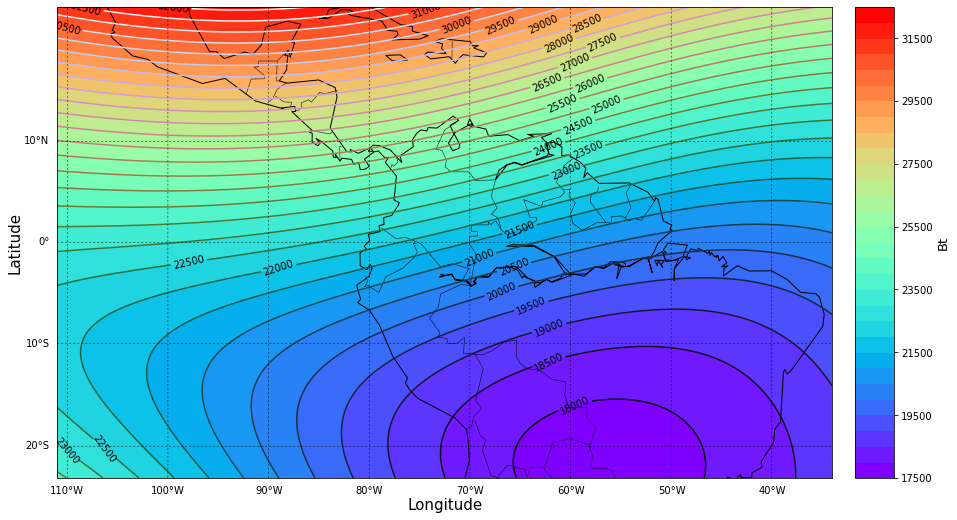

In [ ]:
Data3, DfData3 =MagneticField(Lati,Long,Relu,date,h)

Data Frame

In [ ]:
DfData3.to_csv('MagneticField_T3.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory
